## EDA on articles.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading articles.csv
article_df = pd.read_csv("articles.csv")
article_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [4]:
## Data type
## All are nominal data
article_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [5]:
## Dataset shape
article_df.shape

(105542, 25)

In [6]:
## Seems like each variables "_no" or "_id" or "_code" correspond to the "_name"
## Drop all column with "_no", "_id", "_code" to prevent the machine thinking that "1" is more than "2", except "articel_id"

article_df_no1 = article_df.iloc[:, 1:]

article_df_no1.drop(article_df_no1.columns[article_df_no1.columns.str.contains('_no|_code|id')], axis=1, inplace=True)

article_df2 = pd.concat([article_df_no1, article_df['article_id']], axis =1)
article_df2

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,108775015
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",110065002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,5pk regular Placement1,Socks,Socks & Tights,Placement print,Black,Dark,Black,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights,Socks in a fine-knit cotton blend with a small...,953450001
105538,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...,953763001
105539,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec...",956217002
105540,CLAIRE HAIR CLAW,Hair clip,Accessories,Solid,Black,Dark,Black,Small Accessories,Divided,Divided,Divided Accessories,Accessories,Large plastic hair claw.,957375001


In [7]:
article_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   prod_name                     105542 non-null  object
 1   product_type_name             105542 non-null  object
 2   product_group_name            105542 non-null  object
 3   graphical_appearance_name     105542 non-null  object
 4   colour_group_name             105542 non-null  object
 5   perceived_colour_value_name   105542 non-null  object
 6   perceived_colour_master_name  105542 non-null  object
 7   department_name               105542 non-null  object
 8   index_name                    105542 non-null  object
 9   index_group_name              105542 non-null  object
 10  section_name                  105542 non-null  object
 11  garment_group_name            105542 non-null  object
 12  detail_desc                   105126 non-null  object
 13 

In [8]:
## Check for missing value

article_df2.isnull().sum()

prod_name                         0
product_type_name                 0
product_group_name                0
graphical_appearance_name         0
colour_group_name                 0
perceived_colour_value_name       0
perceived_colour_master_name      0
department_name                   0
index_name                        0
index_group_name                  0
section_name                      0
garment_group_name                0
detail_desc                     416
article_id                        0
dtype: int64

In [9]:
## For the sake of ease of EDA, will drop column "detail desc". Other column already give almost the same description already
## Now, no missing value

article_df2.drop('detail_desc', axis= 1, inplace= True)
article_df2.head(20)

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775015
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065002
5,OP T-shirt (Idro),Bra,Underwear,Solid,Light Beige,Dusty Light,Beige,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065011
6,20 den 1p Stockings,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111565001
7,20 den 1p Stockings,Socks,Socks & Tights,Solid,Beige,Medium Dusty,Beige,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111565003
8,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111586001
9,Support 40 den 1p Tights,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111593001


In [10]:
## There are three redundant columns: 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name'
## Checking the value of each column to see if they are the same or similar --> may delete if thet are similar

print(article_df2['colour_group_name'].value_counts())
print(article_df2['perceived_colour_value_name'].value_counts())
print(article_df2['perceived_colour_master_name'].value_counts())

Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


In [11]:
## they all explain the color in a similar way 
## possibly when customer search, the result will be 'perceived_colour_value_name' + 'perceived_colour_master_name' = 'colour_group_name
## then no use for 'colour_group_name'

article_df2.drop('colour_group_name', axis=1, inplace=True)
article_df2.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775015
1,Strap top,Vest top,Garment Upper body,Solid,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065002


In [12]:
## See if "index_name" and "index_group_name" are redundant
print(article_df2['index_name'].value_counts())
print(article_df2['index_group_name'].value_counts())

## See if "department_name" and "garment_group_name" are redundant
print(article_df2['department_name'].value_counts())
print(article_df2['garment_group_name'].value_counts())

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64
Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64
Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License 

In [13]:
##'garment_group_name' name things in a weird way --> remove
article_df2.drop('garment_group_name', axis=1, inplace=True)
article_df2.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,108775015
1,Strap top,Vest top,Garment Upper body,Solid,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,110065002


In [14]:
## Check how many variety of item in each column are there

p = 0
for col in article_df2.columns:
    p = article_df2[col].value_counts().count()
    print(col, ':', p)
    
## There are 45875 products in the store, 

prod_name : 45875
product_type_name : 131
product_group_name : 19
graphical_appearance_name : 30
perceived_colour_value_name : 8
perceived_colour_master_name : 20
department_name : 250
index_name : 10
index_group_name : 5
section_name : 56
article_id : 105542


In [15]:
## Check point

article_df3 = article_df2.copy()

In [16]:
article_df3['prod_name'].value_counts()

Dragonfly dress                98
Mike tee                       72
Wow printed tee 6.99           70
1pk Fun                        55
TP Paddington Sweater          54
                               ..
W MARCIE DRESS CNY              1
W NAPOLI SKIRT CNY              1
BEANIE JERSEY FLEECED LINED     1
H-string multicolour            1
Lounge dress                    1
Name: prod_name, Length: 45875, dtype: int64

In [17]:
## Create function to compute piechart of top 5 most frequent value
def piechart(data_set):
    n = 5
    tp = data_set.value_counts().sort_values(ascending = False)
    top = tp[:n].index.tolist()
    temp = data_set.value_counts().head(n)
    colors = sns.color_palette('pastel')[0:5]
    explode = [0.1,0.0,0.01,0.01,0.01]
    
    plt.pie(temp, labels = top, colors = colors, explode = explode, autopct='%.0f%%')
    plt.show()

In [18]:
column = article_df3.columns.tolist()
column

['prod_name',
 'product_type_name',
 'product_group_name',
 'graphical_appearance_name',
 'perceived_colour_value_name',
 'perceived_colour_master_name',
 'department_name',
 'index_name',
 'index_group_name',
 'section_name',
 'article_id']

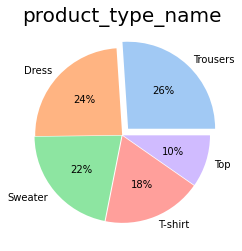

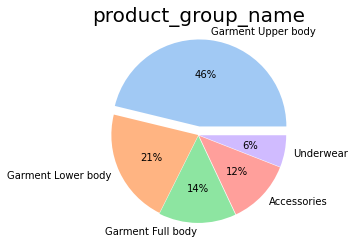

In [19]:
##Checking product type and group
product_type_column = ['product_type_name', 'product_group_name']
for col in product_type_column:
    plt.title(col,fontsize=20, pad = 3.0)
    piechart(article_df3[col])

In [20]:
## Check what 'Dress' product_group_name is 
dress = article_df3[article_df3['product_type_name'].str.contains('Dress')]
dress.head(1)

,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,article_id
204,Knit dress,Dress,Garment Full body,Solid,Dark,Grey,Tops Knitwear DS,Divided,Divided,Divided Selected,192460006


From what we can see here, 'Garment upper body' constitue almost half of the store with top 3 product types are Sweater, T-Shirt, and Top. 'Trouser' seems to be the most product for Garment Lower body. They also stock alot of 'Dress' even though 'Garment Full Body' contributed only 14% of the total product.

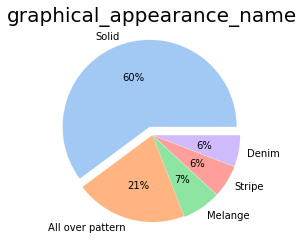

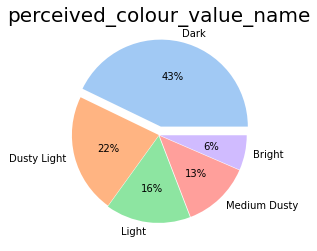

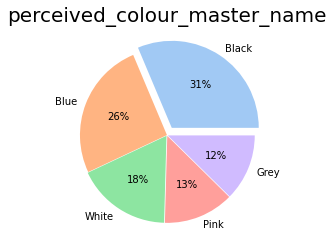

In [21]:
## Checking the Design of the poduct
product_type_column = [ 'graphical_appearance_name',
 'perceived_colour_value_name',
 'perceived_colour_master_name',]
for col in product_type_column:
    plt.title(col,fontsize=20, pad = 3.0)
    piechart(article_df3[col])

The most common theme of the product is 'Dark' with 'Black' and 'Blue' dominating the product line. About 2/3 of the product line has no pattern.

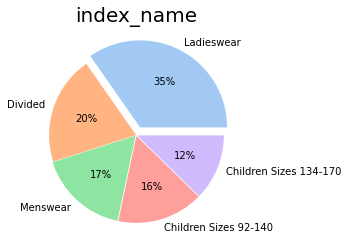

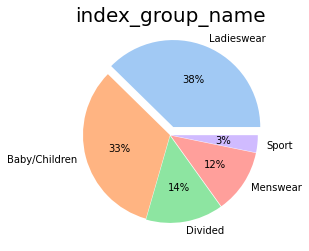

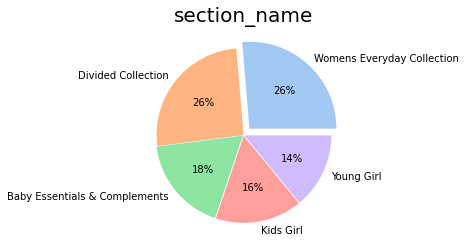

In [22]:
## Checking the categories of the poduct
product_type_column = [
 'index_name',
 'index_group_name',
 'section_name']
for col in product_type_column:
    plt.title(col,fontsize=20, pad = 3.0)
    piechart(article_df3[col])

Women's clothes comprised most of the H&M porduct categories. From what we can see, both Ladieswear and Baby/Children constitue to a little more than 2/3 of the store with Ladieswear at 38%. Most proportion of Baby/children wear seems to be for 'Young Girl' and 'Kids Girl'.

## EDA on Customer.csv

In [23]:
pd.set_option("display.max_rows", None)
cus_df = pd.read_csv('/Users/napatpongsakonpruttikul/Documents/Programming project/HM product recommendation/Dataset/customers.csv')
cus_df.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


- Cannot find how to read the postal_code in the given format --> plan to group based on city or country, but no luck trying to read it, so will drop 'postal_code'. 
- Seems like 'FN' = if a customer get Fashion News newsletter,
    - Check if there is more value than 'Regulary' and 'NONE' -> if only these two then will drop 'fashion_news_frequency' as FN is already binary
- Have check the value for both 'club_member_status and 'Active' first

for column explanation
https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/307001

In [24]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [25]:
## Check columns
column_cus = cus_df.columns
column_cus

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [26]:
# Checking the sshape
cus_df.shape

(1371980, 7)

In [27]:
## only 'postal_code' can be dropped
cus_df2 = cus_df.copy()
cus_df2.drop('postal_code', axis= 1, inplace= True)
cus_df2.head()


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0


In [28]:
## Check for missing value
cus_df2.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
dtype: int64

In [29]:
print(cus_df2['FN'].value_counts())
print(cus_df2['Active'].value_counts())

1.0    476930
Name: FN, dtype: int64
1.0    464404
Name: Active, dtype: int64


In [30]:
## Dealing with missing value
cus_df2['FN'] = cus_df2['FN'].fillna(0)
cus_df2['Active'] = cus_df2['Active'].fillna(0)

In [31]:
print(cus_df2['club_member_status'].value_counts())
print('number of missing value =', cus_df2['club_member_status'].isnull().sum())

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64
number of missing value = 6062


In [32]:
## Use mode to replace missing value
cus_df2['club_member_status'] = cus_df2['club_member_status'].fillna(cus_df2['club_member_status'].mode()[0])
print(cus_df2['club_member_status'].value_counts())
print('number of missing value =', cus_df2['club_member_status'].isnull().sum())

## Check for missing value and value type
print(cus_df2['fashion_news_frequency'].value_counts())
print('number of missing value =', cus_df2['fashion_news_frequency'].isnull().sum())

ACTIVE        1278553
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64
number of missing value = 0
NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64
number of missing value = 16009


In [33]:
## Check for missing value and value type
print(cus_df2['fashion_news_frequency'].value_counts())
print('number of missing value =', cus_df2['fashion_news_frequency'].isnull().sum())

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64
number of missing value = 16009


In [34]:
## merge Redundant value NONE and None into 'NONE'
cus_df2['fashion_news_frequency'] = cus_df2['fashion_news_frequency'].replace('None', 'NONE')

## replacing missing value with mode
cus_df2['fashion_news_frequency'] = cus_df2['fashion_news_frequency'].fillna(cus_df2['fashion_news_frequency'].mode()[0])

#Recheck
print(cus_df2['fashion_news_frequency'].value_counts())
print('number of missing value =', cus_df2['fashion_news_frequency'].isnull().sum())

NONE         893722
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64
number of missing value = 0


In [35]:
## Checking range of 'age'
max_age = max(cus_df2['age'])
min_age = min(cus_df2['age'])
print('max age is', max_age)
print('minimun age is', min_age)
print('range of "age" is', max_age - min_age)
## Check for missing value in 'age'
print('number of missing value =', cus_df2['age'].isnull().sum())

max age is 99.0
minimun age is 16.0
range of "age" is 83.0
number of missing value = 15861


<AxesSubplot:xlabel='age', ylabel='Count'>

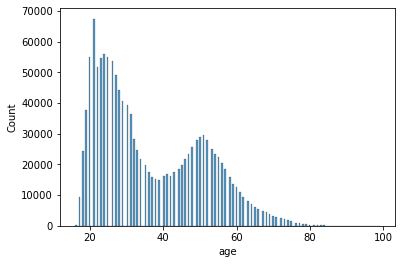

In [36]:
## minimum age of 16 make sense, but 90 years old might not make sense
## Ploting histogram: bimodal and skew to the left

sns.histplot(cus_df2['age'])

In [37]:
## Seeing the percentage of missing value in 'age' to the total number of row to see if it is possible to delete the row that have missing value in age
## only 1.15% --> delete the column
per = 15861/1371979 * 100
per

1.1560672575892197

In [38]:
cus_df2.dropna(axis = 0, inplace=True)
cus_df2.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

Text(0.5, 0, 'sample')

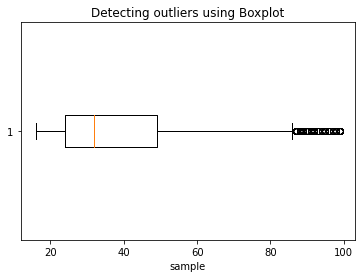

In [39]:
#Plotting boxplot
age = cus_df2['age']

plt.boxplot(age, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('sample')

In [40]:
#Finding outlier, upper bound, and lower bound
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print("Upper bound is", upr_bound)
    print("Lower bound is", lwr_bound)
    
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
age_outliers = detect_outliers_iqr(age)
print("Outliers from IQR method: ", age_outliers)
print("Min value of outliers from IQR method: ", min(age_outliers))

Upper bound is 86.5
Lower bound is -13.5
Outliers from IQR method:  [87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 92.0, 92.0, 9

In [41]:
## Putting a cap on the maximum age --> converting outlier age to age at 95th percentile
## Finding 95th percentile first
ninety_fifth_percentile = np.percentile(age, 95)
print("95th percentile is", ninety_fifth_percentile, "years old")

cus_df2['age'] = np.where((cus_df2['age']> 62), 62 ,cus_df2['age'])

95th percentile is 62.0 years old


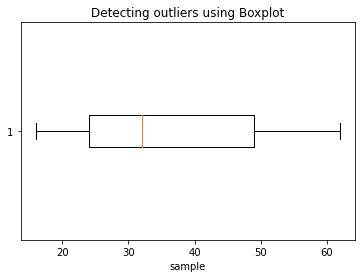

In [42]:
## Check if there is still outliers
plt.boxplot(cus_df2['age'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('sample')
plt.show()

In [43]:
## Checkpoint 
cus_df3 = cus_df2.copy()
cus_df3.head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0


In [44]:
## Seeing proportion of each chart
def piechart2(data_set):
    top = data_set.value_counts().index.tolist()
    temp = data_set.value_counts()
    colors = sns.color_palette('bright')[0:5]
    
    
    plt.pie(temp, labels = top, colors = colors, autopct='%.0f%%')

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.0     0.0   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.0     0.0   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age         Age group  
0             ACTIVE                   NONE  49.0  middle-age adult  
1             ACTIVE                   NONE  25.0      young adult   
2             ACTIVE                   NONE  24.0    emerging adult  
3             ACTIVE                   NONE  54.0  middle-age adult  
4             ACTIVE              Regularly  52.0  middle-age adult  


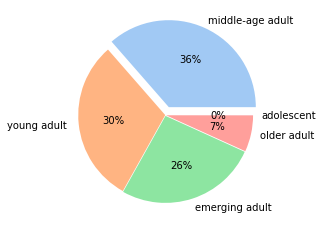

In [45]:
## Grouping age into adolescent(<18), emerging adult (18-24), young adults (25-35), middle-age adult (36-59), older adults (>60) modified from this paper https://www.frontiersin.org/articles/10.3389/fnagi.2016.00074/full
## Create new column called 'Age group'

bins= [0,17,25,36,60,100]
labels = ['adolescent','emerging adult','young adult ','middle-age adult','older adult']
cus_df3['Age group'] = pd.cut(cus_df3['age'], bins=bins, labels=labels, right=False)
print(cus_df3.head())

## Visualizing age group 
piechart(cus_df3['Age group'])

In [46]:
## removing age column
cus_df3.drop('age', inplace=True, axis=1)
cus_df3.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,Age group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,middle-age adult
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,young adult
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,emerging adult
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,middle-age adult
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,middle-age adult


In [47]:
##Check point
cus_df4 = cus_df3.copy()

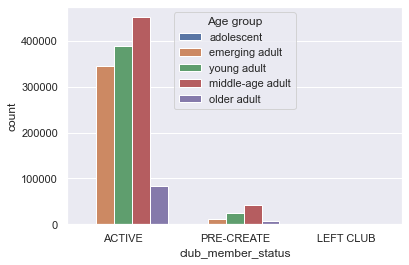

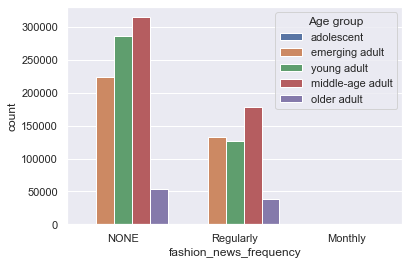

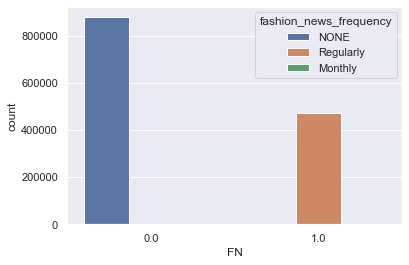

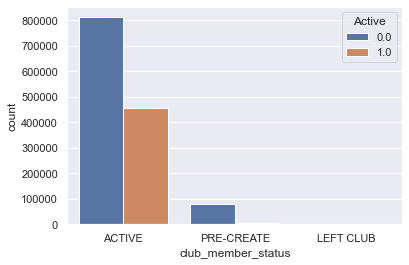

In [48]:
sns.set_theme(style="darkgrid")
sns.countplot(x = "club_member_status", hue = "Age group", data = cus_df4)
plt.show()

sns.countplot(x = "fashion_news_frequency", hue = "Age group", data = cus_df4)
plt.show()

sns.countplot(x = "FN", hue = "fashion_news_frequency", data = cus_df4)
plt.show()

sns.countplot(x = "club_member_status", hue = "Active", data = cus_df4)
plt.show()

### EDA for transactions_train.csv

In [49]:
df_trans = pd.read_csv("/Users/napatpongsakonpruttikul/Documents/Programming project/HM product recommendation/Dataset/transactions_train.csv")
df_trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [50]:
# t_dat = date of purchase
# customer_id
# article_id = product bought
# price
# Sales_channel_id: 1 = offline, 2 = online

print(df_trans.info())
print(df_trans.shape)
print(df_trans.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
None
(31788324, 5)
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


In [51]:
## Check number of customer in the dataset
number_of_customer = df_trans['customer_id'].unique().size
print('the total number of customer:', number_of_customer)

## Total transcation made in the dataset
total_trans = df_trans['customer_id'].count()
print('Total number of transaction made:', total_trans)

## Estimated number of item bought by each customer
print('Estimated number of product bought per person:', total_trans/number_of_customer)

the total number of customer: 1362281
Total number of transaction made: 31788324
Estimated number of product bought per person: 23.334630667241193


count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64


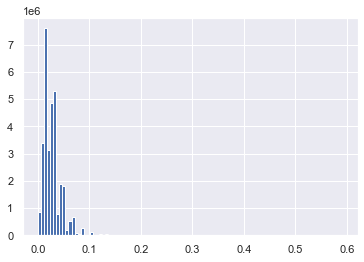

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64


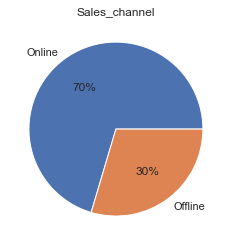

In [52]:
## Checking stat of price
print(df_trans['price'].describe())

## Checking the histogram to see the distribution of price
plt.hist(x = df_trans['price'] , bins = 100)
plt.show()

## Means of buying the product: 1 = offline, 2 = online
print(df_trans['sales_channel_id'].value_counts())

## Piechart
labels = ('Online', 'Offline')
sales_count = df_trans['sales_channel_id'].value_counts()

plt.title('Sales_channel')    
plt.pie(sales_count, labels = labels, autopct='%.0f%%')
plt.show()

In [53]:
df_trans['t_dat'] = pd.to_datetime(df_trans['t_dat'], format='%Y-%m-%d')
df_trans['t_dat'].head()

0   2018-09-20
1   2018-09-20
2   2018-09-20
3   2018-09-20
4   2018-09-20
Name: t_dat, dtype: datetime64[ns]

In [54]:
## Goal: must predict next purchase within next week
## Transform date into only by week, that will predict the last week as the depenedent variable (Y)

df_trans['week'] = 104 - (df_trans.t_dat.max() - df_trans.t_dat).dt.days // 7
df_trans['week'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104])

In [63]:
## checkpoint
df_trans2 = df_trans.copy()
df_trans2.head()

,t_dat,customer_id,article_id,price,sales_channel_id,week
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,0
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,0


In [65]:
## Drop 't_dat', will use week instead
df_trans2.drop('t_dat', inplace=True, axis=1)

In [66]:
df_trans2.head()

,customer_id,article_id,price,sales_channel_id,week
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,0
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,0


In [ ]:
## Plan: change customer_id and article_id into string
## include top 10 most popular product during the 1-last week as a variable
## include most frequent product category bought as a variable or might put last product bought